<a href="https://colab.research.google.com/github/cml096/GoogleColabRepo/blob/master/cristobal/Data-02/Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_excel('OperTot - PowerView_ARCH1.xlsx')

In [2]:
list_drop = ['ID','shiftindex','crew#','unit#','tmcat08','tmcat09','tmcat10','tmcat11','tmcat12','tmcat13','tmcat14','tmcat15','tmcat16','tmcat17','tmcat18','tmcat19']
df.drop(list_drop,axis=1,inplace=True)

In [3]:
df = df.rename(columns={'unit':'Unidad'})
df = df.rename(columns={'shift#':'Turno'})

In [4]:
df.Turno = df.Turno.astype(str)
df.totaltons = df.totaltons.astype(int)

In [5]:
def dia(fecha):
  aux = str(fecha.date()).split('-')
  dia = str(aux[2])
  return dia

def mes(fecha):
  aux = str(fecha.date()).split('-')
  mes = str(aux[1])
  return mes

def ano(fecha):
  aux = str(fecha.date()).split('-')
  ano = str(aux[0])
  return ano


In [6]:
df['Dia'] = df.apply(lambda row : dia(row['shiftdate']),axis=1)
df['Mes'] = df.apply(lambda row : mes(row['shiftdate']),axis=1)
df['Año'] = df.apply(lambda row : ano(row['shiftdate']),axis=1)

filtro unit


In [7]:
df_numeric_loads = df[(df.Unidad == 'Camion') | (df.Unidad == 'Pala')]
df_numeric_times = df[(df.Unidad == 'Aljibe') | (df.Unidad == 'Auxil') | (df.Unidad == 'Moto') | (df.Unidad == 'Perforadora') | (df.Unidad == 'Tractor')]

3 datas:


*   df = todos los datos
*   df_numeric_loads = camiones y palas
*   df_numeric_times = aljibes, auxil, moto, perforadora y tractor



In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

#Data 1

Uso df_numeric_loads -> Camiones y Palas

In [9]:
data_2019 = df_numeric_loads[df_numeric_loads.Año == "2019"]
data_2020 = df_numeric_loads[df_numeric_loads.Año == "2020"]

In [16]:
semestre_2_2019 = data_2019[(data_2019.Mes == '07') | (data_2019.Mes == '08') | (data_2019.Mes == '09') | (data_2019.Mes == '10') | (data_2019.Mes == '11') | (data_2019.Mes == '12')]
semestre_1_2020 = data_2020[(data_2020.Mes == '01') | (data_2020.Mes == '02') | (data_2020.Mes == '03') | (data_2020.Mes == '04') | (data_2020.Mes == '05') | (data_2020.Mes == '06')]
semestre_2_2020 = data_2020[(data_2020.Mes == '07') | (data_2020.Mes == '08') | (data_2020.Mes == '09') | (data_2020.Mes == '10') | (data_2020.Mes == '11') | (data_2020.Mes == '12')]

##Plot 1

In [11]:
group_1 = semestre_2_2019.groupby([pd.Grouper(key='shiftdate', freq='W-MON'),'Turno','Unidad']).mean().reset_index().sort_values('shiftdate')
group_2 = semestre_1_2020.groupby([pd.Grouper(key='shiftdate', freq='W-MON'),'Turno','Unidad']).mean().reset_index().sort_values('shiftdate')
group_3 = semestre_2_2020.groupby([pd.Grouper(key='shiftdate', freq='W-MON'),'Turno','Unidad']).mean().reset_index().sort_values('shiftdate')

In [12]:
group_sem_2_2019 = pd.DataFrame(group_1)
group_sem_1_2020 = pd.DataFrame(group_2)
group_sem_2_2020 = pd.DataFrame(group_3)

###turno

promedio de toneladas movidas por Camion vs promedio de toneladas movidas por Pala, en cada turno

Text(0.5, 0, 'Fecha')

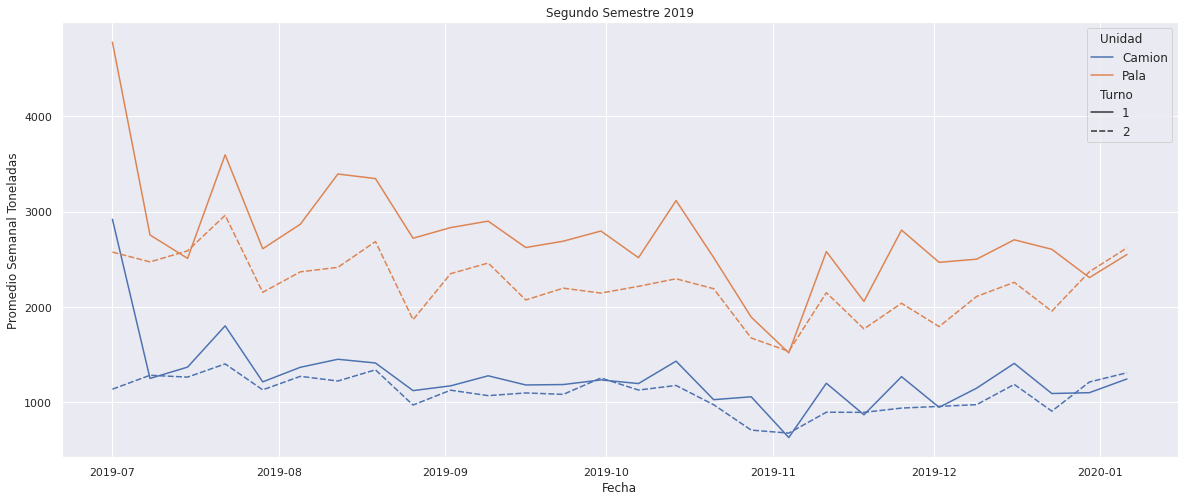

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.lineplot(x="shiftdate", y="totaltons",
                  hue="Unidad", style="Turno",
                  data=group_sem_2_2019)
ax.set_title('Segundo Semestre 2019')
ax.set_ylabel('Promedio Semanal Toneladas')
ax.set_xlabel('Fecha')

Text(0.5, 0, 'Fecha')

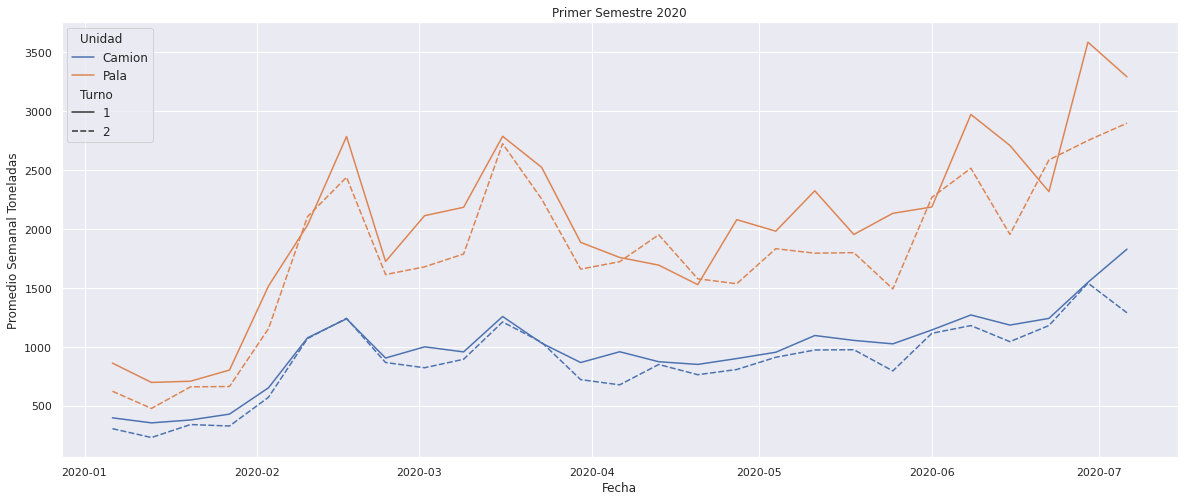

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.lineplot(x="shiftdate", y="totaltons",
                  hue="Unidad", style="Turno",
                  data=group_sem_1_2020)
ax.set_title('Primer Semestre 2020')
ax.set_ylabel('Promedio Semanal Toneladas')
ax.set_xlabel('Fecha')
savefig('Promedio_toneladas_semanales_primer_semestre_2020.pdf')

Text(0.5, 0, 'Fecha')

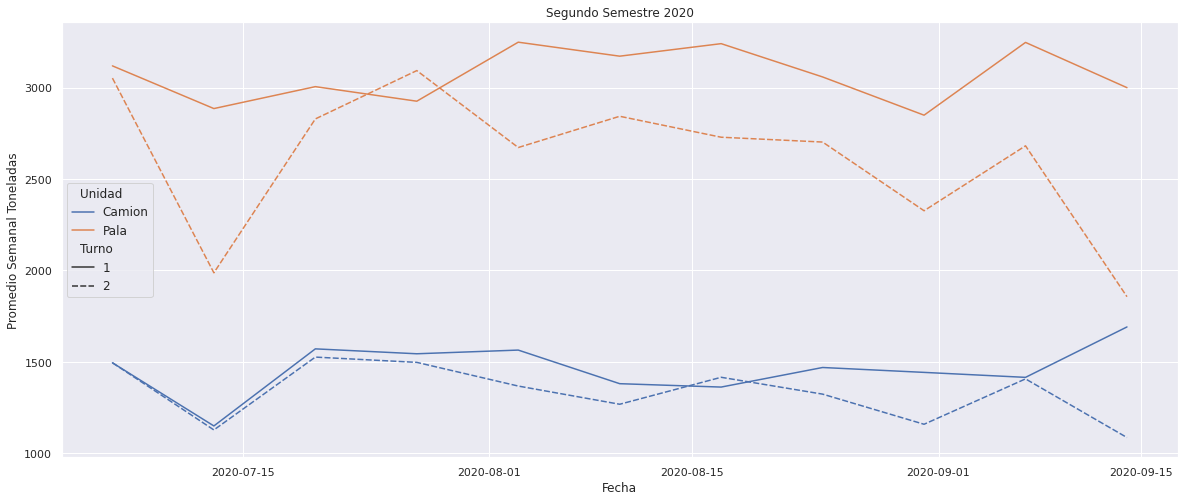

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.lineplot(x="shiftdate", y="totaltons",
                  hue="Unidad", style="Turno",
                  data=group_sem_2_2020)
ax.set_title('Segundo Semestre 2020')
ax.set_ylabel('Promedio Semanal Toneladas')
ax.set_xlabel('Fecha')
savefig('Promedio_toneladas_semanales_segundo_semestre_2020.pdf')

###tiempo

In [10]:
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('inferno')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(25,10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

In [11]:
palas_2019_t1 = data_2019[(data_2019.Unidad == 'Pala') & (data_2019.Turno == '1')]
palas_2019_t2 = data_2019[(data_2019.Unidad == 'Pala') & (data_2019.Turno == '2')]

In [12]:
palas_2019_t1 = palas_2019_t1[(palas_2019_t1.Mes == '11')]

In [13]:
turno_1_2019 = pd.DataFrame(palas_2019_t1.groupby(['shiftdate']).sum().reset_index().sort_values('shiftdate'))
turno_2_2019 = pd.DataFrame(palas_2019_t2.groupby(['shiftdate']).sum().reset_index().sort_values('shiftdate'))

In [16]:
turno_1_2019.head()

,shiftdate,start,logintime,totaltime,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
0,2019-11-01,-403200,66453,777600,381,87230,92803,22117,27328,381,777600,142248,0,52794,306266,135872,97220,43200
1,2019-11-02,-403200,102047,777600,236,55439,75643,16582,18820,236,777600,111045,0,11091,227698,161399,223167,43200
2,2019-11-03,-360000,48564,777600,219,51604,84395,12203,19004,219,777600,115602,0,8764,221234,198000,216000,18000
3,2019-11-04,-446400,183832,777600,246,57679,81735,12423,20894,246,777600,115284,0,10900,219550,212286,219580,0
4,2019-11-05,-518400,291275,777600,311,72893,86216,19562,19197,311,777600,125103,0,7170,217162,190104,223233,14828


creamos un diccionario de datos a partir de las fechas llamado dict_date y creamos un array que contiene todos los tiempos de cada dia llamado times, luego en la iteracion lo que hacemos es asignar a cada dia del diccionario los tiempos que le corresponden


In [14]:
dict_date = turno_1_2019['shiftdate'].T.to_dict()
times = turno_1_2019[['tmcat01','tmcat03','tmcat04','tmcat05','tmcat06','tmcat07']].div(3600).to_numpy()
i = 0
for key, value in dict_date.items():
  dict_date[key] = times[i]
  i += 1

survey dos parametros results = objest dict // diccionario de datos y un category_names = array

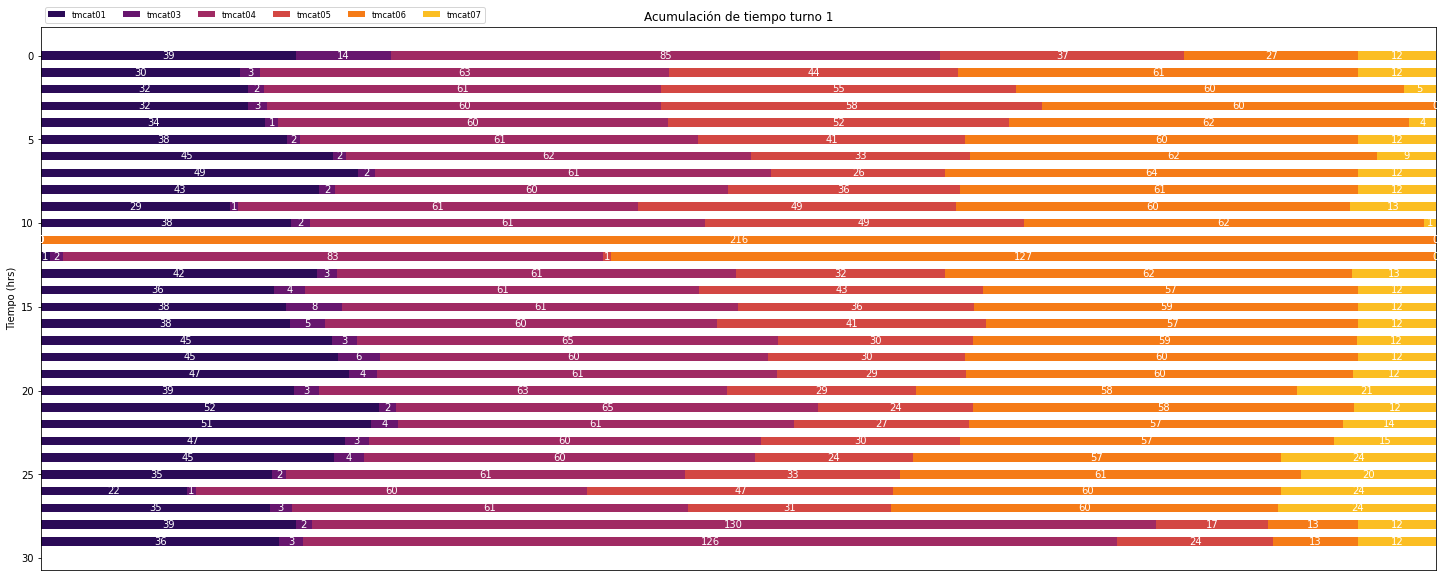

In [15]:
import numpy as np
import matplotlib.pyplot as plt

category_names = ['tmcat01','tmcat03','tmcat04','tmcat05','tmcat06','tmcat07']
results = dict_date
fig, ax = survey(results, category_names)
ax.set_title('Acumulación de tiempo turno 1')
ax.set_ylabel('Tiempo (hrs)')
plt.show()

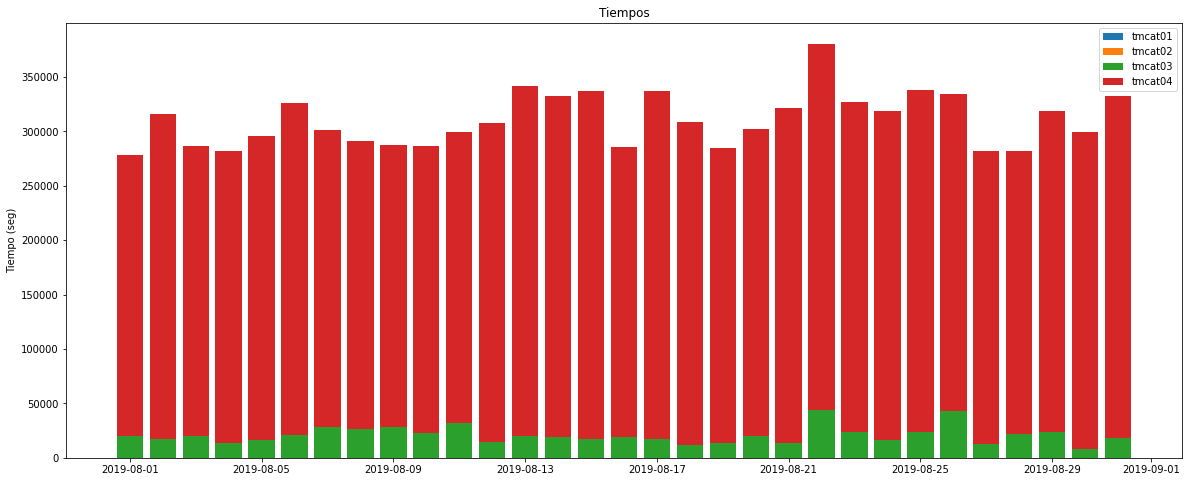

In [121]:
fig, ax = plt.subplots(figsize=(20,8))

ax.bar(turno_1_2019['shiftdate'], turno_1_2019['tmcat01'], label='tmcat01')
ax.bar(turno_1_2019['shiftdate'], turno_1_2019['tmcat02'], label='tmcat02', bottom=turno_1_2019['tmcat01'])
ax.bar(turno_1_2019['shiftdate'], turno_1_2019['tmcat03'], label='tmcat03', bottom=turno_1_2019['tmcat02'])
ax.bar(turno_1_2019['shiftdate'], turno_1_2019['tmcat04'], label='tmcat04', bottom=turno_1_2019['tmcat03'])
#ax.bar(turno_1_2019['shiftdate'], turno_1_2019['tmcat05'], label='tmcat05')
#ax.bar(turno_1_2019['shiftdate'], turno_1_2019['tmcat06'], label='tmcat06')
#ax.bar(turno_1_2019['shiftdate'], turno_1_2019['tmcat07'], label='tmcat07')

ax.set_ylabel('Tiempo (seg)')
ax.set_title('Tiempos')
ax.legend()

plt.show()

## Plot 2

In [ ]:
df_numeric_loads.corr()

In [ ]:
tefe_2019 = data_2019[data_2019.tmcat01 != 0]
tefe_2020 = data_2020[data_2020.tmcat01 != 0]

In [ ]:
load_2019 = data_2019[data_2019.loadcnt != 0]

Text(0.5, 0, 'Fecha')

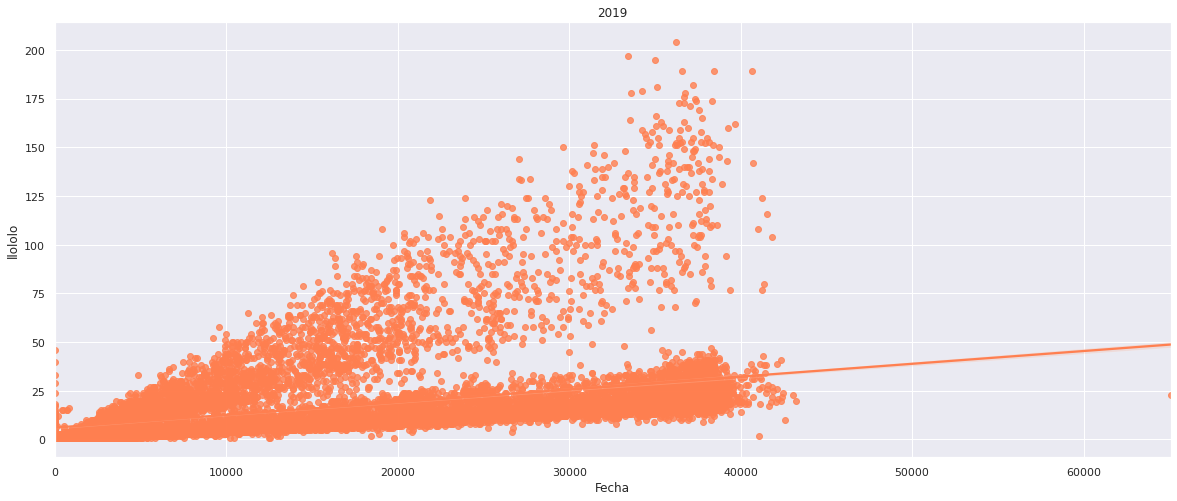

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.regplot(x="tmcat01", y="totalloads", data=load_2019,
                 color="coral")
ax.set_title('2019')
ax.set_ylabel('llololo')
ax.set_xlabel('Fecha')

Text(0.5, 0, 'Fecha')

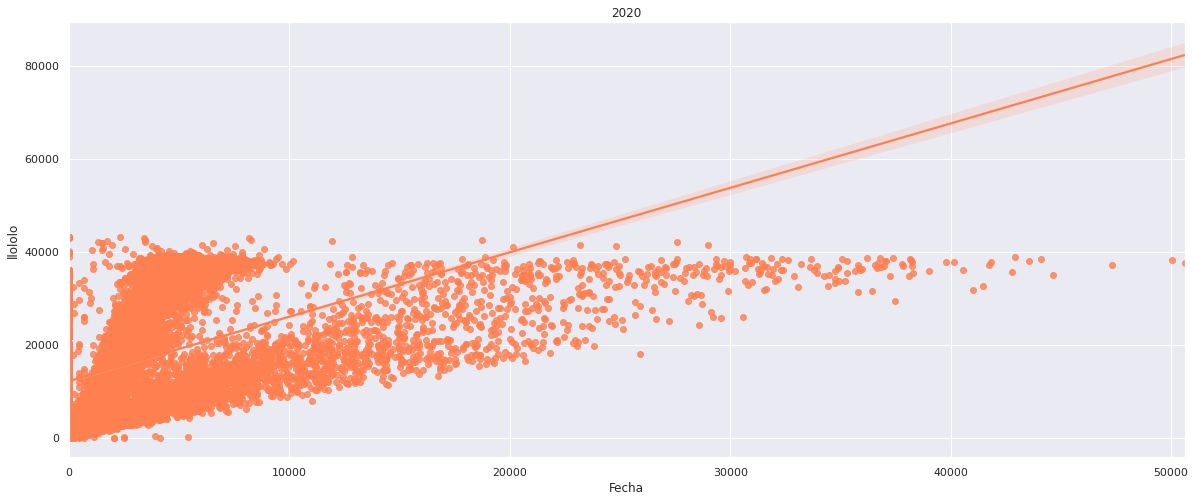

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.regplot(x="totaltons", y="tmcat01", data=tefe_2020,
                 color="coral")
ax.set_title('2020')
ax.set_ylabel('llololo')
ax.set_xlabel('Fecha')

# Data 2

Uso df_numeric_times -> aljibes, auxil, moto, perforadora y tractor

In [ ]:
times_2019 = df_numeric_times[df_numeric_times.Año == "2019"]
times_2020 = df_numeric_times[df_numeric_times.Año == "2020"]

In [ ]:
group_2019 = times_2019.groupby([pd.Grouper(key='shiftdate', freq='W-MON'),'Turno','Unidad']).mean().reset_index().sort_values('shiftdate')
group_2020 = times_2020.groupby([pd.Grouper(key='shiftdate', freq='W-MON'),'Turno','Unidad']).mean().reset_index().sort_values('shiftdate')

In [ ]:
group_2019 = pd.DataFrame(group_2019)
group_2020 = pd.DataFrame(group_2020)

Text(0.5, 0, 'Fecha')

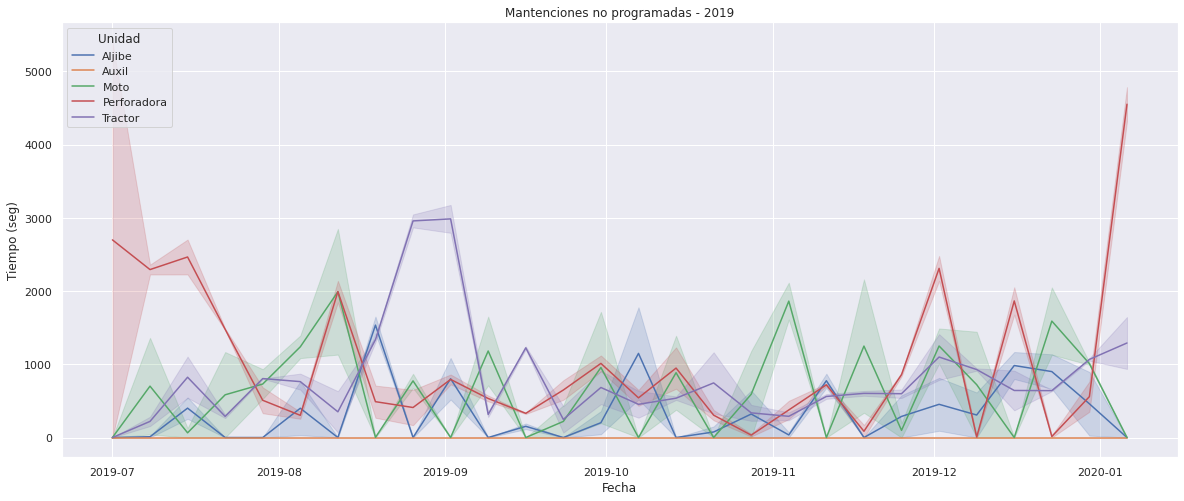

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.lineplot(x="shiftdate", y="tmcat07",
                  hue="Unidad",
                  data=group_2019)
ax.set_title('Mantenciones no programadas - 2019')
ax.set_ylabel('Tiempo (seg)')
ax.set_xlabel('Fecha')

Text(0.5, 0, 'Fecha')

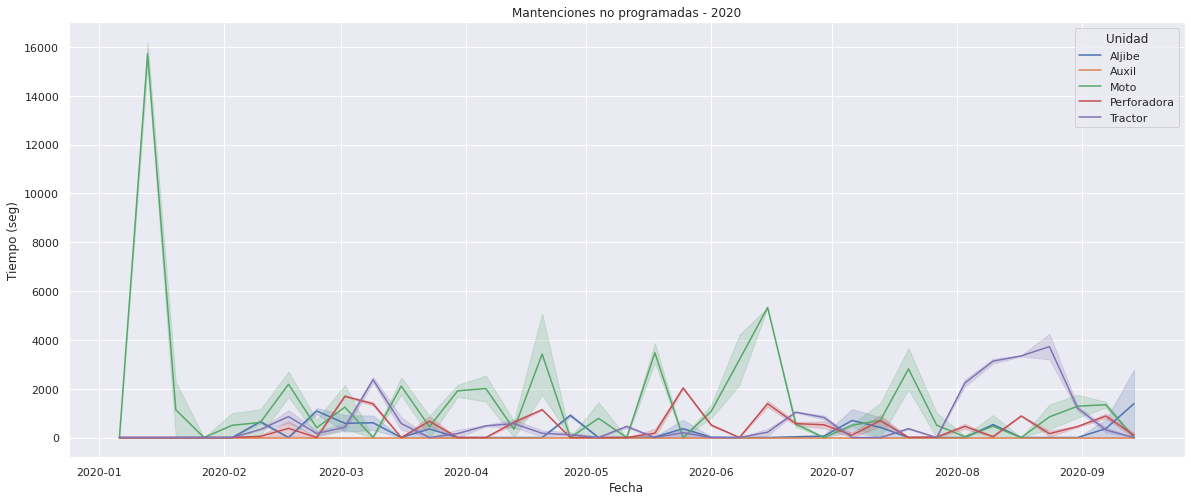

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
ax = sns.lineplot(x="shiftdate", y="tmcat07",
                  hue="Unidad",
                  data=group_2020)
ax.set_title('Mantenciones no programadas - 2020')
ax.set_ylabel('Tiempo (seg)')
ax.set_xlabel('Fecha')

# Freak

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120441 entries, 0 to 120440
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   shiftdate   120441 non-null  datetime64[ns]
 1   Turno       120441 non-null  object        
 2   start       120441 non-null  int64         
 3   crew        120441 non-null  object        
 4   eqmtid      120441 non-null  object        
 5   logintime   120441 non-null  int64         
 6   locid       120441 non-null  object        
 7   operid      120441 non-null  object        
 8   totaltime   120441 non-null  int64         
 9   pit         120441 non-null  object        
 10  Unidad      120441 non-null  object        
 11  totalloads  120441 non-null  int64         
 12  totaltons   120441 non-null  int64         
 13  loadtime    120441 non-null  int64         
 14  idletime    120441 non-null  int64         
 15  spottime    120441 non-null  int64         
 16  lo

In [ ]:
group = df.groupby(['operid']).count()

In [ ]:
pd.DataFrame(group)

,shiftdate,Turno,start,crew,eqmtid,logintime,locid,totaltime,pit,Unidad,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,Dia,Mes,Año
operid,,,,,,,,,,,,,,,,,,,,,,,,,,,
-7631,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
00001,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
00002,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179
00004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00007,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78001,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
78761,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71
78771,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25


In [ ]:
def box_1(i,j):
  Y = df.tmcat05#df['t_mantencionNP']
  X = df.Unidad#df['glosa_tipoeq']
  plt.rcParams['figure.figsize']=(i,j)
  sns.barplot(x=X,y=Y,data=df)

def box_2(i,j):
  Y = df.tmcat07#df['t_mantencionP']
  X = df.Unidad#df['glosa_tipoeq']
  plt.rcParams['figure.figsize']=(i,j)
  sns.barplot(x=X,y=Y,data=df)

def box_3(i,j):
  Y = df.tmcat04#df['t_reserva']
  X = df.Unidad#df['glosa_tipoeq']
  plt.rcParams['figure.figsize']=(i,j)
  edad_sub=sns.barplot(x=X,y=Y,data=df)

def box_4(i,j):
  Y = df.tmcat06#df['t_inhabil']
  X = df.Unidad#df['glosa_tipoeq']
  plt.rcParams['figure.figsize']=(i,j)
  edad_sub=sns.barplot(x=X,y=Y,data=df)

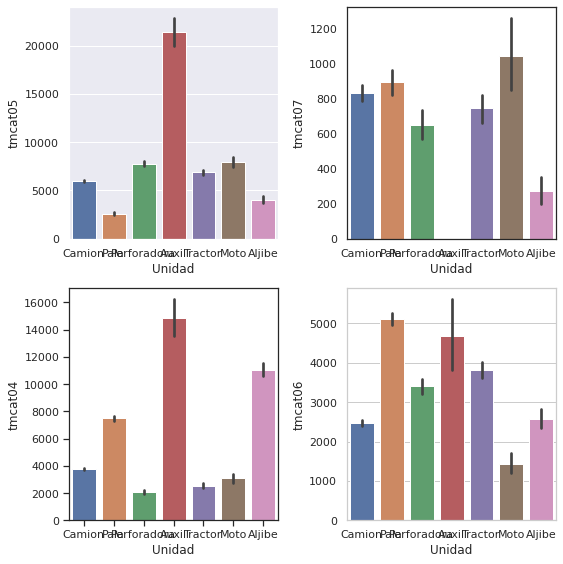

In [ ]:
f = plt.figure(figsize=(8, 8))
gs = f.add_gridspec(2, 2)
i=10
j=5

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    box_1(i,j)

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    box_2(i,j)

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    box_3(i,j)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    box_4(i,j)

f.tight_layout()